Zoë Weber

May 27, 2016

In [7]:
#Imports
from numpy import *
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table

### b) orbital distance

For an object in a Keplerian (eliptical) orbit, the gravitational two-body problem says

$$
r=\frac{a(1-e^2)}{(1+e\cos f)}.
$$

$r$ is the distance from the focus of an ellipse as a function of $f$

$f$ is the true anomaly

$a$ is the semi-major axis

$e$ is the eccentricity

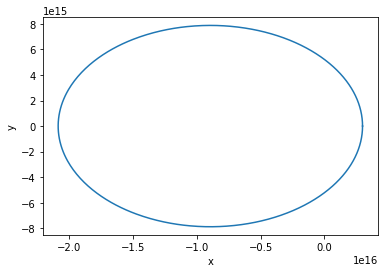

In [21]:
#Full circle orbit (degrees)
f = linspace(0,2*pi,1000)

def planet_r(f,a,e):
    r = ( a * ( 1.0 -e**2. )) / (1.0 + e * cos(f) )
    return r

#transforming orbital angle and distance to cartesian coordinates 
xpos = planet_r(f,1.19e16,0.75)*cos(f) #planet r we will compare to our numerical version
ypos = planet_r(f,1.19e16,0.75)*sin(f)

#Plots our numerical solution
plt.plot(xpos,ypos)
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")

plt.show()

# Simulating Gravitational Dynamics with Ordinary Differential Equations


## 1) Orbital motion in the solar system

Planets orbit under the gravitational influence of the sun, in vector form this down is

(1) $\Large \vec{a} = -\frac{G M_\odot}{r^3}\vec{r}$ 

The first we break this down to re-write the acceleration

(2) $\Large \vec{a} = \frac{d^2 \vec{r} }{d t^2}$

Setting this equal to equation 1

(3) $\Large \frac{d^2 \vec{r} }{d t^2} = -\frac{G M_\odot}{r^3}\vec{r}$

To solve this 2nd order differential equation numerically, we re-write it as two first order equations. 

(4) $\Large \frac{d \vec{r}}{dt} = \vec{v}$

(5) $\Large \frac{d \vec{v}}{dt} = -\frac{G M_\odot}{r^3}\vec{r}$

Since $\vec{r} = (x,y)$ and $\vec{v} = (v_x,v_y)$, we can  rewrite equations 4 and 5 for each of the components of the vectors.

(6) $\Large \frac{d x}{dt} = v_x$

(7) $\Large \frac{d y}{dt} = v_y$

(8) $\Large \frac{d v_x}{dt} = -\frac{G M_\odot}{r^3} x$

(9) $\Large \frac{d v_y}{dt} = -\frac{G M_\odot}{r^3} y$

For this code will make use of the equations above by creating a derivatives function. This function will contain four variables $(x,y,v_x,v_y)$ and their corresponding derivatives. Fianlly we will define define $G=6.67\times10^{-8}$ cm$^3$ g$^{-1}$ s$^{-2}$ , $M_\odot=1.989\times10^{33}$ grams as constants inside the function.

In [12]:
# Dedfined constants
G = 6.67e-8
M = 1.989e33

def orbital_derivs(vec):   
    
    x = vec[0]
    y = vec[1]
    vx = vec[2]
    vy = vec[3]
    
    #total velocity magnitude
    v = sqrt(vx**2 + vy**2)
    r = sqrt(x**2 + y**2)
    
    dxdt = vx
    dydt = vy
    dvxdt = (((-G * M))/(r**3))*x
    dvydt = (((-G * M))/(r**3))*y
    
    derivarray =  array([dxdt,dydt,dvxdt,dvydt])
    
    return derivarray

### 4th Order Runge Kutta


The 4th Order Runge Kutta uses 4 estimates, One on the left (starting point of the step), one on the right (ending point of the step), and two in the middle. We then take a weighted average of these to project across a step interval. The formula looks like this:

$$
\large 
k_1 = h f \left(t^n, \ x_i^n \right) \\
\large
k_2 = h f \left(t^n + {h\over 2}, \ x_i^n + {k_1 \over 2} \right) \\
\large
k_3 = h f \left(t^n + {h\over 2}, \ x_i^n + {k_2 \over 2}\right) \\
\large
k_4 = h f \left(t^n + h, \ x_i^n + k_3 \right) \\
$$

then,

$$
\large
x_i^{n+1}=x_i^n + {1 \over 6}k_1 + {1 \over 3}k_2 + {1 \over 3}k_3 + {1 \over 6}k_4
$$


Using the 4th Order Runge Kutta method we integrate the orbit of our hypothetical "planet 9" over at least one orbit so that we can compare this with our numerical orbit plotted above. To do so, we increase the the number of nsteps until our plots match.

          x                    y          ...         t        
---------------------- ------------------ ... -----------------
            2.0825e+16                0.0 ...               0.0
 2.082486282153336e+16  37793684010078.74 ...  947027027.027027
2.0824451283874356e+16   75586870101110.5 ... 1894054054.054054
2.0823765380245544e+16 113379060316327.78 ... 2841081081.081081
2.0822805099350524e+16 151169756623514.53 ... 3788108108.108108
 2.082157042537295e+16  188958460877263.1 ... 4735135135.135135
2.0820061337975144e+16 226744674781208.47 ... 5682162162.162162
 2.081827781229631e+16 264527899850232.56 ... 6629189189.189189
2.0816219818950364e+16  302307637372630.6 ... 7576216216.216216
2.0813887324023344e+16  340083388372232.6 ... 8523243243.243243
                   ...                ... ...               ...
 1.206531061885505e+16 7592107392859860.0 ... 936609729729.7297
1.1984549102267134e+16 7606520585154139.0 ... 937556756756.7567
 1.190328900612927e+16 7620617326186512.

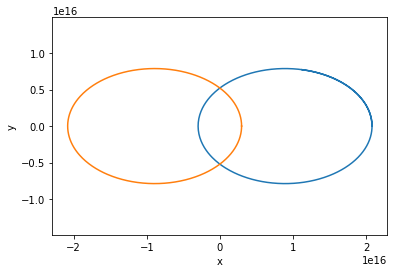

In [24]:
nsteps = 1000 # we tried 100, 300, then 1000
# 1000 is the number of steps necessary to generate an orbit to match analytic plot

G = 6.67e-8
M = 1.989e33
a = 1.19e16
e = 0.75
rmax = (a*(1. + e))
vy = sqrt(G*M*((2/rmax)-(1/a)))

x0 = rmax
y0 = 0.0
vx0 = 0.0
vy0 = vy 

#initial values
initialvalues = array([x0,y0,vx0,vy0])

#the set of times to find the solution
times = linspace(0,9.4608e11,nsteps)

#time increment, dt
dt = times[1]-times[0]

#blank 2D array to fill with our solution
result = zeros( (len(times), len(initialvalues) ) )

pos_array = initialvalues.copy()
for i,t in enumerate(times):
    
    #filling the result array
    result[i]  = pos_array
     
    #advance using runge kitta 
    k1 = dt*orbital_derivs(pos_array)
    k2 = dt*orbital_derivs(pos_array + k1/2.0)
    k3 = dt*orbital_derivs(pos_array + k2/2.0)
    k4 = dt*orbital_derivs(pos_array + k3)
    
    pos_array += k1/6. + k2/3. + k3/3. + k4/6.
    
#converts the solution into a table so we can see column names
colums = ['x','y','vx','vy']
sol = Table(result,names=colums)

#add times column
sol['t'] = times

print(sol) 

#plots our numerical solution
plt.plot(sol['x'],sol['y'])
plt.plot(xpos,ypos)
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

It was found that when integrating, a larger number of intervals created a numerical model that more accurately matched that of our analytical one. The reason being that creating a larger amount of steps reduces the size of local truncation errors.
